# Projet de data scientist: Prévision de crédits logement
## Objectif:
Base de donées des clients d'une banque, pour chaque profil, on va voir si on va accorder un crédit à ce client ou pas.

-> Site KAGGLE. Travailler sur la base de données "Home Loan": crédit de maison. On va créer un modèle qui va permettre de savoir est-ce qu'on va accorder un crédit logement à un client ou pas. Dans le dataset, on a: le sexe, la situation maritale, dependants(nbr d'enfants). 
- Connecter à Kaggle en utilisant le compte gmail car kaggle a été acheté par google donc on peut y accéder grâce au compte gmail ->
- cliquer sur download -> 
- ouvrir un notebook sur google collab -> 
- importer la base de donnée dans le notebook: cliquer sur le fichier à gauche -> chercher la bdd dans l'ordinateur -> on a 2bases (test.csv et train.csv), on va s'intéresser à la base train. L'idée est de comprendre les étapes. -> prendre le notebook -> faire glisser la bdd dans le notebook -> pour ne pas perdre les données, accéder à google drive(se connecter -> faire glisser la bdd dans my drive.
- copier le chemin, coller dans 'chemin' de df

On a posé la problématique, après on veut voir comment arriver à un modèle et après comment le déployer.




Analyser les données d'une société ou d'une boutique qui vend des smartphones ou des gadgets. On veut analyser les données et on veut répondre à certaines questions business. Basé sur

In [2]:
#importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Ouvrir le base de données

In [3]:
df_credit=pd.read_csv('E:/Formations/DatA/VIDEO_TUTO/FORMASYS/dataset-prévision-de-crédit-logement/train.csv')
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


* **Loan_ID:** identifiant du client ou du dossier de crédit(un client représente un dossier de crédit)
* **Gender:** sexe = Male/Female
* **Married:** situation maritale = No/Yes
* **Dependents:** nombre d'enfants 
* **Education:** diplome = Graduate/Not
* **Self_Employed:** avoir son propre business ou salarié = No/Yes
* **ApplicantIncome:** salaire de la personne qui demande un crédit on va dire (en dollars)
* **CoapplicantIncome:** salaire de la femme ou du mari
* **LoanAmount:** montant du crédit en millier de 
* **Loan_Amount_Term:** nombre de mois 360=30ans
* **Credit_History:** historique de crédit si la personne a déjà un crédit
* **Property_Area:** habitation =Urban/Rural
* **Loan_Status:** accordé un crédit ou pas

In [4]:
#faire une copie du fataframe pour garder une copie de la bdd et réaliser le travail sur cette base
#comme ça, on aura 2 bdd: originale(df_credit) et néttoyée(df à manipuler pour le prétraitement)
df=df_credit.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#examiner le type de colonne
#object=catégorique
#si on trouve income object, ce n'est pas correct, mais ici, tout est correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#taille de la bdd
df.shape
#614 lignes= nbr de clients, 13 colonnes= nbr de variables pour l'étude

(614, 13)

In [7]:
#examiner les valeurs manquantes
df.isnull().sum()
#valeurs manquantes pas énorme par rapport au nbr total de clients
#pour credit_history, il se peut que les clients viennent d'autre banques et on n'a pas d'historique claire pour ces clients

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer las valeurs manquantes:
* pour les variables catégoriques, on va les remplacer par le mode
* pour les variables numériques, on va les remplacer par la moyenne ou "la médiane"

Connaitre les variables catégoriques et numériques

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
print('Les variables catégoriques sont:', var_cat)
print('Les variables numériques sont:', var_num)

Les variables catégoriques sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
Les variables numériques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [10]:
#supprimer les valeurs manquantes coté variables catégoriques
#inplace=True pour enregistrer la modif dans df
#mode()[0] pour les variables bimodale et prendre la 1ère ligne
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) 
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [11]:
#supprimer les valeurs manquantes coté variables numériques
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Analyse univariée
Prendre variable par variable et les étudier(caractéristiques et variable de sortie)
- variable target/de sortie: Loan_status

In [13]:
df['Loan_Status'].value_counts()
#nbre de crédits accordés et non accordés

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
#voir en terme de pourcentage
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Crédit accordé ou pas'}>

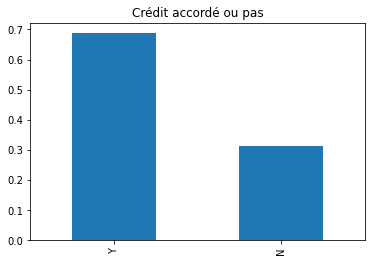

In [15]:
#visualiser
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Crédit accordé ou pas')

### Variables indépendantes:
**Les variables catégoriques:** Married, self_employed, credit_history

In [16]:
df['Gender'].value_counts()
#502 hommes et 112 femmes
# value_counts affiche les valeurs uniques(key sensitive) male Male seront affichés s'il y avait male

Male      502
Female    112
Name: Gender, dtype: int64

In [17]:
df['Gender'].value_counts(normalize=True)*100
#81% hommes: les hommes ont plus tendance à demander des crédits
#18% femmes

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Comparaison des sexes'}>

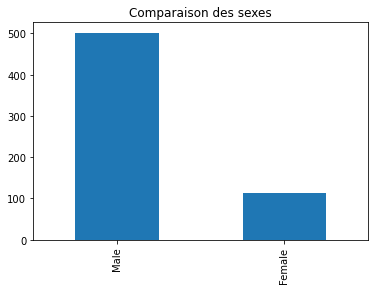

In [18]:
df['Gender'].value_counts().plot.bar(title='Comparaison des sexes')

In [19]:
df['Dependents'].value_counts(normalize=True)*100
#58% des couples ont 0enfant
#16% ont 1
#16% ont 2
#8% ont plus de trois
#la majorité des demandeurs ont 0 enfants

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':"Le nombre d'enfants"}>

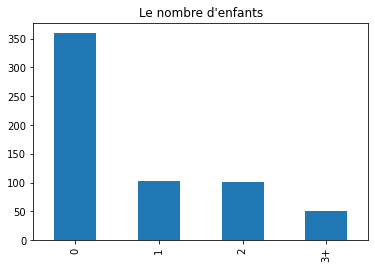

In [20]:
df['Dependents'].value_counts().plot.bar(title="Le nombre d'enfants")

**Les variables numériques:**

In [21]:
df[var_num].describe()
#afficher des valeurs statistiques

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


614 valeurs, pas de VM.

La moyenne des salaire est 5403, médiane(50%) est 3812 -> écart à cause des valeurs abérrentes ou outliers. Salaire min =150, max=81.000

Salaire moyenne du conjoint 1621, le salaire de l'applicant est toujours supérieur à celui du conjoint. min=0, max=41.667 => existance de outliers

Montant du crédit, moyenne =145.000dollars et médiane=128.000dollars, pas beaucoup de outliers, donc pas beaucoup de différence

La duréée tourne autour de 342 moyenne et médiane 360

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


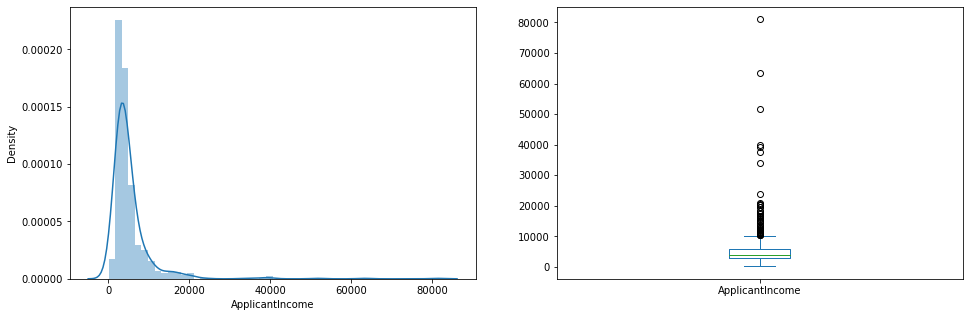

In [22]:
#visualiser. importer matplotlib, seaborn avec pandas
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])
# figure1, diviser en 2sous-figures, la 1ère dans la position (121), la 2ème dans (122)

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('') #pas de titre
plt.show()


Lla distribution des salaires, tous les salaires tournent entre 3003et 5000dollars

Le diagramme en moustache donne une idée sur l'étalement du salaire, il y a beaucoup d'outliers, dont 3 remarquables.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


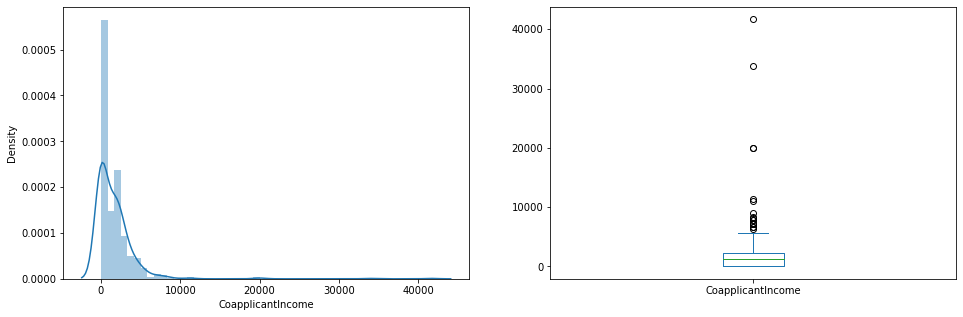

In [23]:
#visualiser. importer matplotlib, seaborn avec pandas
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])
# figure1, diviser en 2sous-figures, la 1ère dans la position (121), la 2ème dans (122)

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('') #pas de titre
plt.show()

Le salaire du demandeur est toujours supérieur, ici, la majorité des persones ont 0, mais la majorité pour les demandeurs est entre 3000 et 5000.

## Analyse bivariée

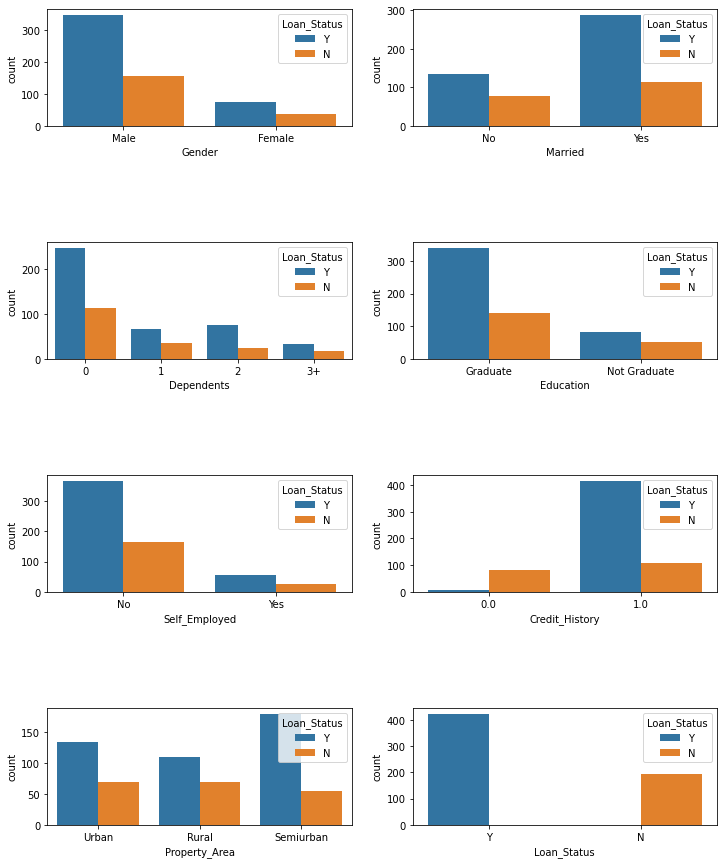

In [24]:
#les variables catégoriques
#on a 8 var_cat: 4lignes et 2colonnes 
fig,axes=plt.subplots(4,2,figsize=(12,15))
#déclarer la boucle
#enumerate==idx parcours la position du contenu de la liste, cat_cot parcours le contenu
for idx, cat_col in enumerate(var_cat):
    #question pour distinger les valeurs paires et impaires, raisonner en terme de reste de la division de idx par rapport à 2
    row,col=idx//2,idx%2
    #critère qui fait la différence: la variable de sortie
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row,col])
plt.subplots_adjust(hspace=1)

Etudier la relation entre chaque variable catégorique (le sexe,situation, ... ) voir variable par variable et de l'autre coté voir la relation avec "Loan_Status", impact des variables sur la variable de sortie.

- Gender:
    * Male: accépté pour 320 et pour 150 refusé (moins que la moitié)
    * Female: accépté pour 70 et refusé pour la moitié
quand on est une femme, on a 50% que le crédit soit rejeté. homme a 60 à 70% que le crédit soit accépté.
- Married:
    * No: 40% accépté et 60% refusé
    * Yes: plus de chance de crédit accépté et moins de chance que le crédit soit refusé
- Dependents:
    * 0: plus que 50% de chance que le crédit soit accépté
    * 2: plus de chance qu le crédit soit accépté, +50%
    * +3: presque 50%
- Credit_History:
    * 1.0: plus de chance que le crédit soit accépté
    * 0.0: la banque ne vous connait pas. monsi de chance d'avoir un crédit accépté
- Loan_Status ne doit pas être dans la liste, créer une liste var_cat et supprimer 

<AxesSubplot:>

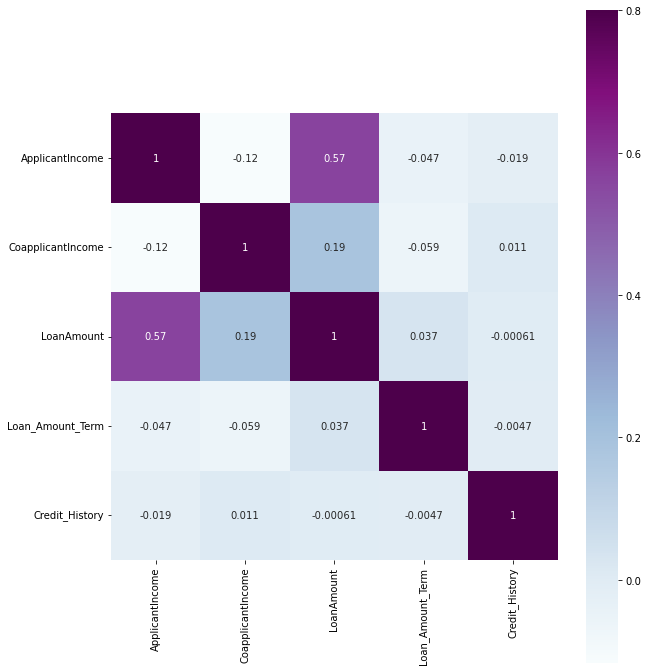

In [25]:
#correlation des variables numériques
matrix=df.corr()
#prendre les variables numériques et les dessiner dans une heatmap
f, ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu',annot=True)

Plus c'est foncé, plus il ya une liaison: plus de 1. Entre LoanAmount et ApplicantIncome, la corr est forte=0.57. Il y a une relation. Entre LoanAmount et CoapplicantIncome, la corr n'est pas très forte=0.19. Il ya des corr même entre les variables numériques, on peut supprimer cette colinéarité, la linéarité entre des variables indépendantes, remplacer par un coeff qu'on peut calculer. Matrice de correlation qui donne une idée sur la relation entre les variables numériques.

## Création du modèle: scikit learn
Préparer la bes de donnée, au début, on a séparé la bdd en 2: var_cat et num_cat

In [26]:
df_cat=df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


### **mettre les valeurs sous formes numérique => utiliser get_dummies**
get_dummies a un double rôle: crée 2 colonnes. Pour "Gender": une colonne 'Male(1)' et une 'Female(0)'. On a une redondance, lorsqu'on a 1 pour 'Male', automatiquement on a 0 pour 'Female', donc il va supprimer cette colonne. Lorsqu'on a une variable avec plusieurs valeurs, 'Dependents' 4valeurs mais on aura 3colonnes, si 0 sans tous les colonnes(0,1,2), il a +3.





In [27]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [28]:
#concatener df_cat avec la partie numérique
df_num=df[var_num]
df_encoded=pd.concat([df_cat,df_num],axis=1)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [29]:
#variable target
y=df_encoded['Loan_Status_Y']
y
#1=accepté, 0=refusé

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [30]:
X=df_encoded.drop('Loan_Status_Y',axis=1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0


In [31]:
#spécifier la partie train généralement 80% et la partie test 20%
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=6) 

In [33]:
#instancier le modèle
clf=LogisticRegression()
#entrainer le modèle sur le trainset
clf.fit(X_train,y_train)

LogisticRegression()

In [34]:
#tester le modèle sur la partie test
pred=clf.predict(X_test)

In [35]:
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [36]:
#calculer à partir du modèle
#y_test: bonnes valeurs extraites de la base de donnée
y_test

387    0
266    1
292    1
392    1
332    1
      ..
309    1
511    1
98     1
238    1
462    1
Name: Loan_Status_Y, Length: 123, dtype: uint8

In [37]:
#comparer pred et y_test
accuracy_score(y_test,pred)
#modèle précis à 83%

0.8373983739837398

Il y a d'autres techniques pour améliorer ce modèle. Ex:
- selection des caractéristiques: il y a des caractéristiques qui ont d'impact et d'autres pas beaucoup d'impact. On peut supprimer quelque colonne et voir comment évolue la précision
- normaliser les valeurs: dans la partie ApplicantIncome, la valeur va jusqu'à 4583, d'un coté, il ya des valeurs de 0 et 1. On peut normaliser les valeurs, i.e rendre toute la base de donnée entre 0 et 1

In [39]:
X.columns #pour connaitre les valeurs à injecter

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [40]:
#pour faire une prévision, choisir un profil test, faire une précision, utiliser le modèle lorsqu'on a un nouveau client
## le modèle va dire si on doit lui donner un crédit ou pas
profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
clf.predict(profil_test)
# 1=crédit accordé

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

# WEB APPLICATION
essayer de l'implémenter dans le web application, essayer de stocker le modèle quelque part. Utiliser $pickle$

In [41]:
#enregistrer le modèle pour pouvoir l'utiliser dans le web application
import pickle

In [42]:
# open('créer un fichier.pkl','droits qu'on donne au fichier')
pickle.dump(clf,open('prevision_credit.pkl','wb'))
# le modèle apparait dans la liste, on aura besoin pour implémenter la web application

- ouvrir "pycharm"
- create new project: projet_credit_kaggle
- clique droit sur projet_credit_kaggle -> new-python file 'main.py'
- ramener la base de donnée dans projet_credit_kaggle
- ouvrir terminal -> installer streamlit: 'pip install streamlit' pour tester si ça marche, 'streamlit hello' ctrl+c pour arrêter l'exécution
- commencer l'écriture du programme dans 'main.py', pour avoir une idée de ce qu'on doit faire, d'abord:
    * importer streamlit as st
    * import pandas as pd
    * import numpy as np
    * import pickle
    
    - collecter le profil d'entrée
    - transformer les données d'entrée en données adaptées au modèle/bdd i.e dans le notebook, on a séparer les données cat et num, transformation par rapport au var_cat, supprimer loan_status, utiliser get_dummies(refaire ces transformation)
    - importer/appliquer le modèle sur le profil d'entrée 
    -
    